In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\jugue\\OneDrive\\Desktop\\Lamina\\Week 2\\netflix.csv')

In [3]:
df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
0,2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,50.112828,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429
1,2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,50.228771,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,50.312571,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,50.336228,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,50.373257,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002


In [4]:
df.describe()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,274.455767,278.638946,270.124592,274.487023,1.049230e+07,53.399584,53.424079,11.920763,15.705041,270.416745,270.522273,266.760420,266.813442,1.151103,272.865067,9.249735,9.231142,9.206930,274.652630
std,166.005094,168.205188,163.612279,165.902954,9.173072e+06,17.763862,13.088270,100.831995,111.396602,164.404981,163.454752,163.189487,161.050027,9.655979,165.259896,8.414224,6.141865,5.898383,165.888569
min,44.605713,45.842857,42.785713,44.887142,1.144000e+06,4.374756,9.152344,-233.333333,-424.012878,49.679943,49.409771,46.385428,46.650698,-59.233806,47.643571,0.599998,1.090197,1.206072,44.887142
25%,109.982502,111.887501,107.117498,110.064998,5.017050e+06,40.015924,43.731175,-74.565801,-71.870319,107.627900,105.923105,105.662982,102.490532,-1.929731,106.655000,3.102141,3.349633,3.351988,110.122497
50%,288.000000,292.690002,282.660004,288.229995,7.795950e+06,53.953919,53.668026,25.632766,27.165946,286.034599,287.382611,287.634151,291.379066,1.535425,284.444750,7.830006,9.445428,9.852787,288.284988
75%,384.542511,391.317505,377.795006,384.560005,1.299060e+07,67.151119,63.378696,94.212764,100.321908,376.592201,381.284113,365.740875,369.343945,5.693881,380.708376,12.715011,13.227332,13.211536,384.857491
max,692.349976,700.989990,686.090027,691.690002,1.333875e+08,96.305710,91.547868,233.333333,356.795719,648.592997,642.765550,616.771798,610.750059,24.347344,672.126996,136.099990,35.221811,27.809882,691.690002


In [5]:
df.isnull().sum()

date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
day_shifted = df['close'].shift() # shift a day after for close column
df['prev_close'] = day_shifted # create a previous close column and use the value from shifted above

df.head()

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,prev_close
0,2014-01-02,52.401428,52.511429,51.542858,51.831429,12325600,34.729664,49.183584,-89.573201,-131.288579,...,50.235157,46.385428,46.650698,0.751929,52.607357,1.052857,1.161182,1.247748,51.871429,NaN
1,2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,...,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142,51.831429
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,...,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000,51.871429
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,...,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856,51.367142
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,...,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002,48.500000


In [8]:
# need to change the time format
df['date'] = pd.to_datetime(df.date)

In [9]:
df.shape

(2516, 21)

In [10]:
# removing or dropping the NaN values created from shifting the day of close
df.dropna(inplace = True)
df

,date,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,...,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,prev_close
1,2014-01-03,52.000000,52.495712,51.842857,51.871429,10817100,35.587886,49.457208,-65.820581,-103.026189,...,50.299327,46.537571,46.754726,0.624259,52.656143,0.664283,1.090197,1.206072,51.367142,51.831429
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,15501500,29.820674,46.087900,-121.472559,-139.640566,...,50.341203,46.680971,46.846621,0.476890,52.666928,1.568569,1.158535,1.231965,48.500000,51.871429
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,36167600,14.371863,32.522091,-206.762171,-238.029120,...,50.268997,46.791957,46.879558,0.127277,52.560214,3.214283,1.452214,1.373559,48.712856,51.367142
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,20001100,18.049045,34.073549,-117.836707,-180.766801,...,50.207969,46.917071,46.916075,-0.131106,52.455357,1.351426,1.437815,1.371978,48.150002,48.500000
5,2014-01-09,48.824287,49.139999,47.857143,48.150002,17007200,15.937607,31.979692,-88.168749,-153.839927,...,50.127262,47.028757,46.940650,-0.376949,52.269286,1.282856,1.415678,1.365612,47.448570,48.712856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2023-12-22,494.000000,496.019989,485.450012,486.760010,2701100,61.286700,62.629263,42.406864,87.904519,...,451.651874,425.729399,432.159056,11.455084,471.507500,10.569977,11.260790,10.724453,491.190002,491.609985
2512,2023-12-26,489.390015,491.480011,486.380005,491.190002,2034500,65.324458,64.613544,31.476352,76.722042,...,453.202389,426.331299,433.327986,11.575034,472.108499,5.100006,10.380678,10.322707,491.790009,486.760010
2513,2023-12-27,491.239990,494.019989,489.250000,491.790009,2561300,65.886676,64.885498,54.412289,74.696489,...,454.715629,426.933199,434.485650,11.584966,472.748000,4.769989,9.579151,9.926084,490.510010,491.190002
2514,2023-12-28,492.000000,492.890015,489.070007,490.510010,1710500,63.331047,63.759744,-14.020755,61.870371,...,456.119330,427.430699,435.595043,11.358617,473.414000,3.820008,8.756417,9.489936,486.880005,491.790009


In [11]:
df.describe

<bound method NDFrame.describe of            date        open        high         low       close    volume  \
1    2014-01-03   52.000000   52.495712   51.842857   51.871429  10817100   
2    2014-01-06   51.889999   52.044285   50.475716   51.367142  15501500   
3    2014-01-07   49.684284   49.698570   48.152859   48.500000  36167600   
4    2014-01-08   48.104286   49.425713   48.074287   48.712856  20001100   
5    2014-01-09   48.824287   49.139999   47.857143   48.150002  17007200   
...         ...         ...         ...         ...         ...       ...   
2511 2023-12-22  494.000000  496.019989  485.450012  486.760010   2701100   
2512 2023-12-26  489.390015  491.480011  486.380005  491.190002   2034500   
2513 2023-12-27  491.239990  494.019989  489.250000  491.790009   2561300   
2514 2023-12-28  492.000000  492.890015  489.070007  490.510010   1710500   
2515 2023-12-29  490.369995  492.230011  481.940002  486.880005   2739500   

          rsi_7     rsi_14       cci_7   

In [12]:
# # we pop off the index, and make the date as the one holding the indexes
# df.index = df.pop('date')
# df

        date       open       high        low      close    volume      rsi_7  \
1 2014-01-03  52.000000  52.495712  51.842857  51.871429  10817100  35.587886   
2 2014-01-06  51.889999  52.044285  50.475716  51.367142  15501500  29.820674   
3 2014-01-07  49.684284  49.698570  48.152859  48.500000  36167600  14.371863   
4 2014-01-08  48.104286  49.425713  48.074287  48.712856  20001100  18.049045   
5 2014-01-09  48.824287  49.139999  47.857143  48.150002  17007200  15.937607   

      rsi_14       cci_7      cci_14  ...     ema_50    sma_100    ema_100  \
1  49.457208  -65.820581 -103.026189  ...  50.299327  46.537571  46.754726   
2  46.087900 -121.472559 -139.640566  ...  50.341203  46.680971  46.846621   
3  32.522091 -206.762171 -238.029120  ...  50.268997  46.791957  46.879558   
4  34.073549 -117.836707 -180.766801  ...  50.207969  46.917071  46.916075   
5  31.979692  -88.168749 -153.839927  ...  50.127262  47.028757  46.940650   

       macd  bollinger  TrueRange     atr_7 

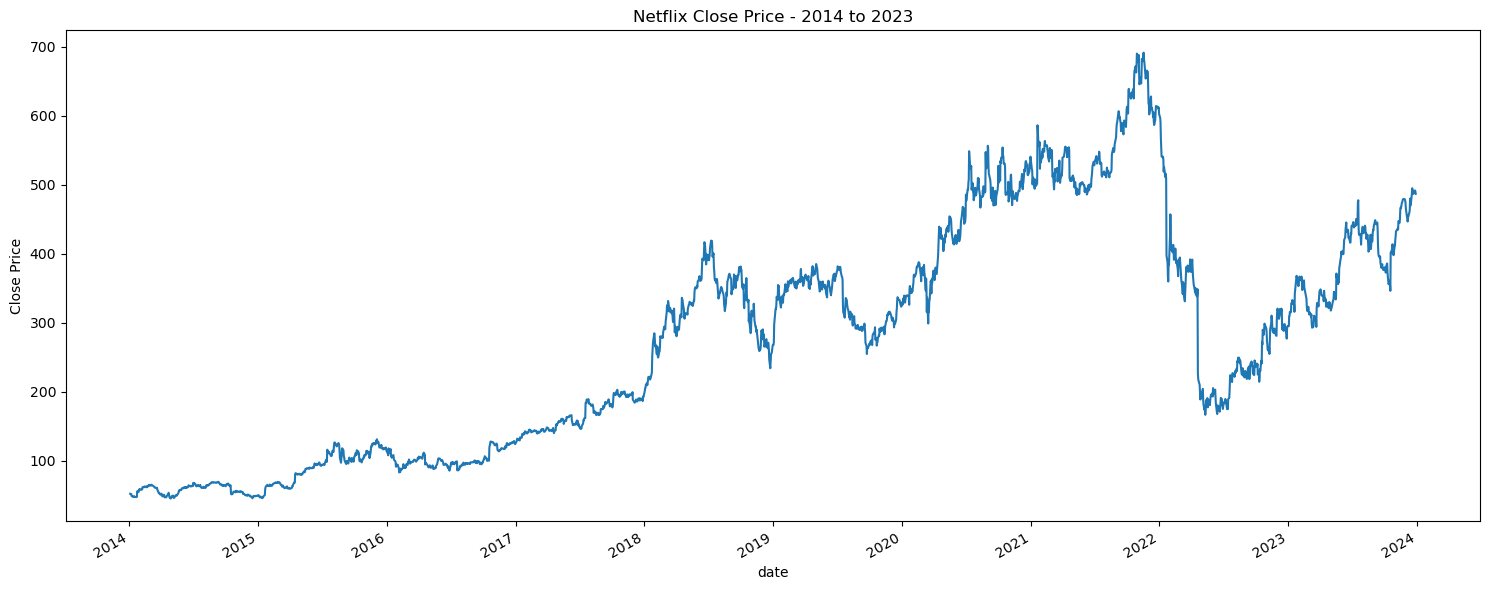

In [13]:

# Check if 'date' is already the index
print(df.head())  # Inspect the first few rows of the dataframe

# If 'date' is already the index, you can skip setting it again
if 'date' in df.columns:
    df.set_index('date', inplace=True)
else:
    print("The 'date' column is not in the dataframe. Please check the column names.")
    print("Available columns:", df.columns)

# plot the closing price which is what we want to predict using linear regression
plt.figure(figsize=(15,6))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title("Netflix Close Price - 2014 to 2023")
df['close'].plot()  # Ensure 'close' is a valid column
plt.tight_layout()
plt.show()

In [14]:
# creating the needed variables

x = df[['open','prev_close']] # these are the inputs that can be changed in order to minimze the MSA but make sure to not overfit
y = df['close'] # what we want to predict

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [16]:
print(x_train.shape, y_train.shape) # to see the percentage of splitting, test and train

(2012, 2) (2012,)


In [17]:
# Linear regression implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [18]:
print(LR.coef_)
print(LR.intercept_)

[ 1.03532629 -0.03705543]
0.487960819686009


In [19]:
# printing the predicted value
predicted = LR.predict(x_test)
print(x_test)
print(predicted)

                  open  prev_close
date                              
2022-03-10  356.200012  358.790009
2018-04-04  273.630005  283.670013
2018-09-11  344.670013  348.410004
2023-08-07  436.459991  431.600006
2016-03-22  100.480003  101.059998
...                ...         ...
2014-10-10   65.685715   65.945717
2014-10-03   64.741432   64.282860
2016-10-19  118.250000  118.790001
2019-12-24  334.010010  333.100006
2015-04-16   76.000000   67.922859

[503 rows x 2 columns]
[355.97607809 273.27278318 344.4234026  436.3733383  100.77272742
 193.66345409 379.09132316 405.55960752 169.72043916 493.64021164
 540.01377187 437.04239101 102.87354172  61.26382165 187.89044773
 329.34015665  63.07087298 192.6576667  354.50557941  63.56682285
 308.55372206 619.51077854 305.04057564  88.57128287 520.75907575
 331.4321774  225.79889765 144.25304527 194.84434889 426.68637515
 450.71105024 386.04173204 504.46652115 274.70915448 556.71251314
 509.98775451 282.54876076 358.94652751  60.84394512  60.12

In [20]:
# Calculating the accuracy of the model
print("Model Accuracy:", LR.score(x_test, y_test))

Model Accuracy: 0.9984665737193708


In [21]:
predicted.shape

(503,)

In [22]:
frame = pd.DataFrame({'Actual Value': y_test, "Predicted": predicted})
print(frame)

            Actual Value   Predicted
date                                
2022-03-10    356.769989  355.976078
2018-04-04    288.940002  273.272783
2018-09-11    355.929993  344.423403
2023-08-07    440.760010  436.373338
2016-03-22     99.839996  100.772727
...                  ...         ...
2014-10-10     64.582855   66.050461
2014-10-03     65.648567   65.134438
2016-10-19    121.870003  118.513480
2019-12-24    333.200012  333.954140
2015-04-16     80.292854   76.655848

[503 rows x 2 columns]


In [23]:
LR.score(x_test, y_test)

0.9984665737193708

In [24]:
LR.score(x_train, y_train)

0.9984833006485468

In [25]:
import math
# Mean Error indicates whether the model needs more adjustment of input, avoid overfitting, more inputs does not mean better result
print("Mean Absolute Error", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error 4.360560757439668
Mean Square Error 41.67089238955067
Root Mean Error 6.455299558467498


In [26]:
# Showing the predicted results and that will be passed on plotting later
predicted = LR.predict(x)
print(predicted)

[ 52.40429178  52.28892264  50.02397448 ... 490.88037825 491.64500307
 490.00484696]


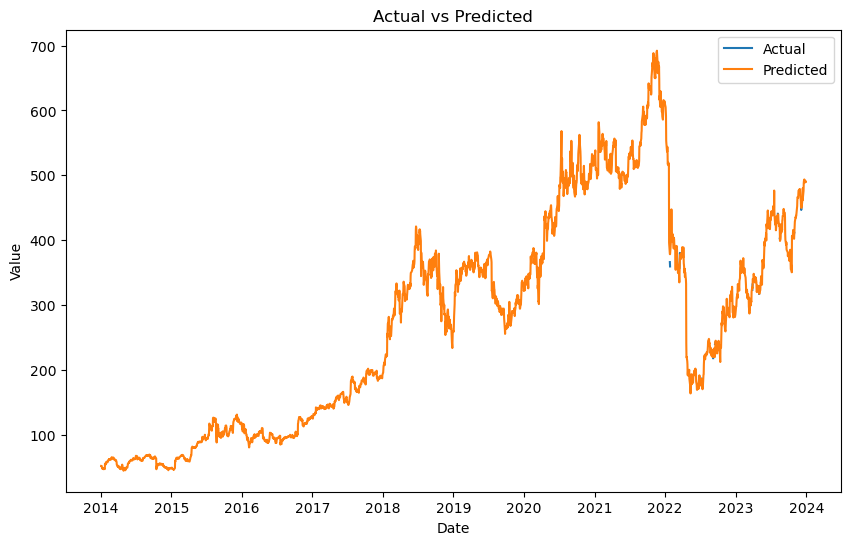

In [30]:
# Convert them to pandas Series with the same index
y_test_series = pd.Series(y_test, index=df.index[-len(y_test):]) #etong part na toh di
predicted_series = pd.Series(predicted, index=df.index[-len(predicted):])

# Plot the graph created by linear regression
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(y_test_series, label="Actual")
plt.plot(predicted_series, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

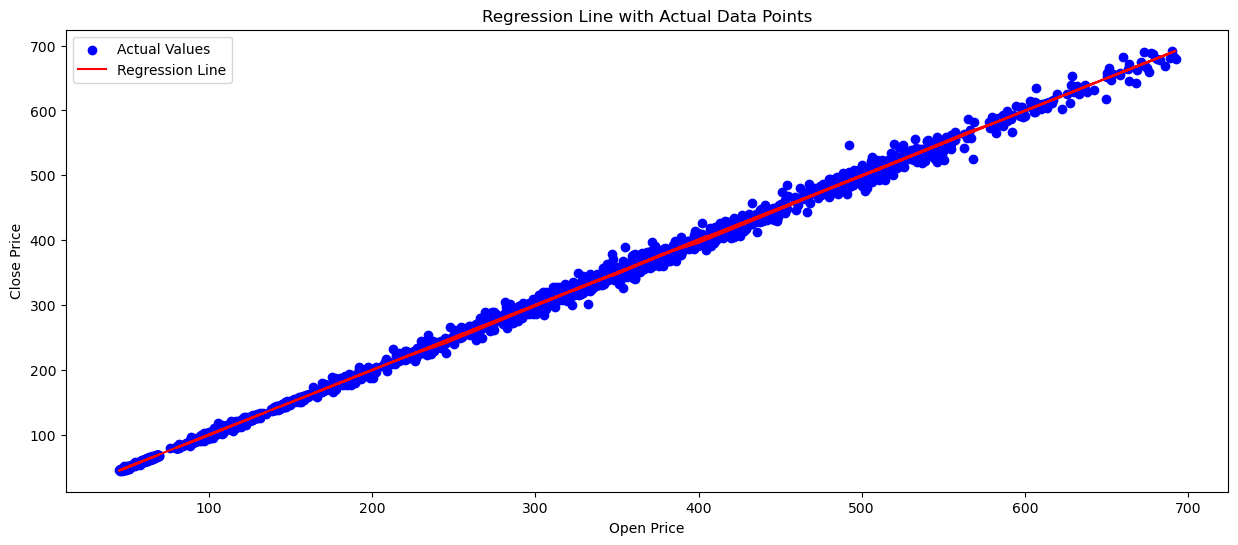

In [33]:
# Plotting the regression line against the 'open' feature
plt.figure(figsize=(15, 6))
plt.scatter(x['open'], y, color="blue", label="Actual Values")  # Scatter plot of actual values
plt.plot(x['open'], LR.predict(x), color="red", label="Regression Line")  # Regression line
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.title("Regression Line with Actual Data Points")
plt.legend()
plt.show()